In [2]:
from psaw import PushshiftAPI
import json
import numpy as np
from collections import Counter
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import csv

In [3]:
api = PushshiftAPI()

# r/GreatApes

## determine available users

In [3]:
author_list = []
authors_com = []  # authors with already-downloaded comments files
authors_sub = []  # authors with already-downloaded submission files

with open(r'D:/ISI REU Python/PSAW Data/Full Data/GreatApes_authors.json','r') as json_file:  # open json of GreatApes users
    for line in json_file:
        author_list.append(line.replace('\n','').replace('"',''))
        
author_list = list(dict.fromkeys(author_list))
author_list.remove("[deleted]")

file_paths = []
for root, directories, files in os.walk(r'D:/ISI REU Python/Authors PSAW (Copy)/'):          # go through Authors PSAW folder to determine already-downloaded
    for filename in files:
        filepath = os.path.join(root, filename)
        if '_submissions.json' in filepath:
            new_filepath = filepath.replace(r'D:/ISI REU Python/Authors PSAW (Copy)/','').replace('_submissions.json','')
            file_paths.append(new_filepath)
file_paths = list(dict.fromkeys(file_paths))

for author in author_list:
    if author in file_paths:
        authors_sub.append(author)

file_paths = []
for root, directories, files in os.walk(r'D:/ISI REU Python/Authors PSAW (Copy)/'):
    for filename in files:
        filepath = os.path.join(root, filename)
        if '_comments.json' in filepath:
            new_filepath = filepath.replace(r'D:/ISI REU Python/Authors PSAW (Copy)/','').replace('_comments.json','')
            file_paths.append(new_filepath)
file_paths = list(dict.fromkeys(file_paths))

for author in author_list:
    if author in file_paths:
        authors_com.append(author)

In [4]:
authors_downloaded = []

for author in authors_sub:
    if author in authors_com:
        authors_downloaded.append(author)
        
# print(authors_downloaded)

In [5]:
df_authors = pd.DataFrame(data={'Authors': authors_downloaded})

In [6]:
df_authors.to_csv(r'D:/ISI REU Python/Analyzed Data/authors_downloaded.csv',index=False)

## determine datetimes of users' first post

In [7]:
df_GreatApes = pd.DataFrame(columns = ['Username','Time (First Post)'])  # create dataframe

for author in authors_downloaded:
    
    posted_times_s = []
    posted_times_c = []

#     if the line in GreatApes, append to temporary times list
    file_name = "D:/ISI REU Python/Authors PSAW (Copy)/"+author+"_submissions.json"
    with open(file_name,'r') as json_file:
        for line in json_file:
            try:
                new_line = json.loads(line)
                if 'subreddit' in new_line.keys():
                    if new_line['subreddit'] == 'GreatApes':
                        posted_times_s.append(new_line['created_utc'])
            except:  # avoid users with empty submission jsons
                print('user ' + author + ' has no submissions')
                continue

    file_name = "D:/ISI REU Python/Authors PSAW (Copy)/"+author+"_comments.json"
    with open(file_name,'r') as json_file:
        for line in json_file:
            try:
                new_line = json.loads(line)
                if 'subreddit' in new_line.keys():
                    if new_line['subreddit'] == 'GreatApes':
                        posted_times_c.append(new_line['created_utc'])
            except:  # avoid users with empty comment jsons
                print('user ' + author + ' has no comments')
                continue

#     determine first post (submission or comment) in GreatApes
    if posted_times_s != [] and posted_times_c != []:  # user posted both submission and comment
        df_GreatApes = df_GreatApes.append({"Username":author,"Time (First Post)":min([min(posted_times_s),min(posted_times_c)])},ignore_index=True)
    elif posted_times_s == [] and posted_times_c != []:                   # user only posted comment
        df_GreatApes = df_GreatApes.append({"Username":author,"Time (First Post)":min(posted_times_c)},ignore_index=True)
    elif posted_times_c == [] and posted_times_s != []:                   # user only posted submission
        df_GreatApes = df_GreatApes.append({"Username":author,"Time (First Post)":min(posted_times_s)},ignore_index=True)
    else:
        print('user ' + author + ' had no data in author file')
    
    print(author + ' done')

Baryshnikov_Rifle done
WoolenWolf done
GoybeSmaap done
zundish done
pppk3125 done
cabmerlot done
evolapatient done
purple_monkey58 done
GodKingThoth done
MajSARS done
Dindu_Nufffins done
user scubaloon has no submissions
scubaloon done
Promotheos done
sink_tinkler done
niggazinspace done
Parentoforphan done
Soviet_Russia321 done
Finn1916 done
Onyx_Blackmen done
I_Hate_NigNogs done
nolo_me done
DeathRoux done
AMasonJar done
1icemonkey done
user throwaway57674e34 has no submissions
throwaway57674e34 done
greytapedindu done
ioncehadsexinapool done
AnarchyFish done
MGloud done
DontGayMeBro done
STOPWHITEOPPRESSION done
BleauGumms done
user kill__all__hippies has no submissions
kill__all__hippies done
Bustatruggalo done
spence120 done
draaaaaaaak done
CertifiedRabbi done
Notathrowaway211 done
GipTukeMan done
blokesmunts done
CantStopWhitey done
WharGoul666 done
CaptainShitshow done
boris902 done
Icanus done
user IFBBodybuilder has no submissions
IFBBodybuilder done
user 14SigHyles88 has no 

In [8]:
# create datetime column

datetimes = []

for index, row in df_GreatApes.iterrows():
    datetimes.append(datetime.datetime.fromtimestamp(row['Time (First Post)']))
    
df_GreatApes['Datetime (First Post)'] = datetimes

In [10]:
df_GreatApes = df_GreatApes.sort_values('Time (First Post)')
df_GreatApes

,Username,Time (First Post),Datetime (First Post)
511,Invalid_Target,1374125927,2013-07-17 22:38:47
17,Finn1916,1377063383,2013-08-20 22:36:23
1430,RAPT0RJESUS,1377127936,2013-08-21 16:32:16
924,AlSharptonIsWorthles,1377205625,2013-08-22 14:07:05
2658,Dayquando,1377212671,2013-08-22 16:04:31
...,...,...,...
7,purple_monkey58,1436945839,2015-07-15 00:37:19
6,evolapatient,1436968777,2015-07-15 06:59:37
2,GoybeSmaap,1437097935,2015-07-16 18:52:15
4,pppk3125,1437135819,2015-07-17 05:23:39


In [11]:
df_GreatApes.to_csv(r'D:/ISI REU Python/Analyzed Data/GreatApes_firstpost.csv',index=False)

## reading downloaded CSVs

In [4]:
authors_downloaded = []

with open(r'D:/ISI REU Python/Analyzed Data/authors_downloaded.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for line in csv_reader:
        for i in line:
            authors_downloaded.append(i)
            
authors_downloaded.remove('Authors')

In [5]:
df_GreatApes = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/GreatApes_firstpost.csv')

In [6]:
df_GreatApes = df_GreatApes.drop(['Time (First Post)'], axis=1)
df_GreatApes

,Username,Datetime (First Post)
0,Invalid_Target,2013-07-17 22:38:47
1,Finn1916,2013-08-20 22:36:23
2,RAPT0RJESUS,2013-08-21 16:32:16
3,AlSharptonIsWorthles,2013-08-22 14:07:05
4,Dayquando,2013-08-22 16:04:31
...,...,...
3289,purple_monkey58,2015-07-15 00:37:19
3290,evolapatient,2015-07-15 06:59:37
3291,GoybeSmaap,2015-07-16 18:52:15
3292,pppk3125,2015-07-17 05:23:39


## reading hate speech lexicon

In [114]:
hate_words = pd.read_csv(r'D:/ISI REU Python/coontown-manually-filtered-hate-words.csv')
hate_words.columns = ['Hate Words']

hate_words = hate_words['Hate Words'].tolist()
hate_words = list(set(hate_words) - set(['nigs','sheboons','groids','kikes','coons','niggers','faggots']))

['nigs', 'sheboon', 'groid', 'tnb', 'dindu', 'nig', 'sheboons', 'gibs', 'chimpout', 'groids', 'kikes', 'kike', 'coons', 'niggers', 'nuffin', 'negroes', 'coon', 'dey', 'whitey', 'faggots', 'faggot', 'ghetto']


## determine instances of hate word in/out of subreddit

In [10]:
# new_authors_downloaded = authors_downloaded[authors_downloaded.index('letsgoblues')+1:]
# new_authors_downloaded.remove('bang_tango')
# print(new_authors_downloaded)

In [113]:
print(hate_words)

['chimpout', 'dey', 'negroes', 'whitey', 'sheboon', 'nuffin', 'coon', 'groid', 'gibs', 'nig', 'tnb', 'faggot', 'ghetto', 'dindu', 'kike']


In [7]:
def word_counter(author, subreddit, post):
    chimpout_counter = 0
    dey_counter = 0
    negroes_counter = 0
    whitey_counter = 0
    sheboon_counter = 0
    nuffin_counter = 0
    coon_counter = 0
    groid_counter = 0
    gibs_counter = 0
    nig_counter = 0
    tnb_counter = 0
    faggot_counter = 0
    ghetto_counter = 0
    dindu_counter = 0
    kike_counter = 0
    counter = 0
    global df_in
    global df_out
#     df_in = pd.DataFrame(columns=["Username","Time",'chimpout', 'dey', 'negroes', 'whitey', 'sheboon', 'nuffin', 'coon', 'groid', 'gibs', 'nig', 'tnb', 'faggot', 'ghetto', 'dindu', 'kike'])
#     df_out = pd.DataFrame(columns=["Username","Time",'chimpout', 'dey', 'negroes', 'whitey', 'sheboon', 'nuffin', 'coon', 'groid', 'gibs', 'nig', 'tnb', 'faggot', 'ghetto', 'dindu', 'kike'])
    
    if post == 'submission':
        if new_line['title'] != None:
            chimpout_counter += new_line['title'].count('chimpout')
            dey_counter += new_line['title'].count('dey')
            negroes_counter += new_line['title'].count('negroes')
            whitey_counter += new_line['title'].count('whitey')
            sheboon_counter += new_line['title'].count('sheboon')
            nuffin_counter += new_line['title'].count('nuffin')
            coon_counter += new_line['title'].count('coon')
            groid_counter += new_line['title'].count('groid')
            gibs_counter += new_line['title'].count('gibs')
            nig_counter += new_line['title'].count('nig')
            tnb_counter += new_line['title'].count('tnb')
            faggot_counter += new_line['title'].count('faggot')
            ghetto_counter += new_line['title'].count('ghetto')
            dindu_counter += new_line['title'].count('dindu')
            kike_counter += new_line['title'].count('kike')
#             counter += len(new_line['title'].split())
        if new_line['selftext'] != None:
            chimpout_counter += new_line['selftext'].count('chimpout')
            dey_counter += new_line['selftext'].count('dey')
            negroes_counter += new_line['selftext'].count('negroes')
            whitey_counter += new_line['selftext'].count('whitey')
            sheboon_counter += new_line['selftext'].count('sheboon')
            nuffin_counter += new_line['selftext'].count('nuffin')
            coon_counter += new_line['selftext'].count('coon')
            groid_counter += new_line['selftext'].count('groid')
            gibs_counter += new_line['selftext'].count('gibs')
            nig_counter += new_line['selftext'].count('nig')
            tnb_counter += new_line['selftext'].count('tnb')
            faggot_counter += new_line['selftext'].count('faggot')
            ghetto_counter += new_line['selftext'].count('ghetto')
            dindu_counter += new_line['selftext'].count('dindu')
            kike_counter += new_line['selftext'].count('kike')
#             counter += len(new_line['selftext'].split())
        if new_line['subreddit'] == subreddit:
            if 'created_utc' in new_line.keys():
                df_in = df_in.append({"Username":author,"Time":datetime.datetime.fromtimestamp(new_line['created_utc']),"Chimpout":chimpout_counter,"Dey":dey_counter,"Negroes":negroes_counter,"Whitey":whitey_counter,"Sheboon":sheboon_counter,"Nuffin":nuffin_counter,"Coon":coon_counter,"Groid":groid_counter,"Gibs":gibs_counter,"Nig":nig_counter,"TNB":tnb_counter,"Faggot":faggot_counter,"Ghetto":ghetto_counter,"Dindu":dindu_counter,"Kike":kike_counter},ignore_index=True)
        else:
            if 'created_utc' in new_line.keys():
                df_out = df_out.append({"Username":author,"Time":datetime.datetime.fromtimestamp(new_line['created_utc']),"Chimpout":chimpout_counter,"Dey":dey_counter,"Negroes":negroes_counter,"Whitey":whitey_counter,"Sheboon":sheboon_counter,"Nuffin":nuffin_counter,"Coon":coon_counter,"Groid":groid_counter,"Gibs":gibs_counter,"Nig":nig_counter,"TNB":tnb_counter,"Faggot":faggot_counter,"Ghetto":ghetto_counter,"Dindu":dindu_counter,"Kike":kike_counter},ignore_index=True)
    if post == 'comment':
        if new_line['body'] != None:
            chimpout_counter += new_line['body'].count('chimpout')
            dey_counter += new_line['body'].count('dey')
            negroes_counter += new_line['body'].count('negroes')
            whitey_counter += new_line['body'].count('whitey')
            sheboon_counter += new_line['body'].count('sheboon')
            nuffin_counter += new_line['body'].count('nuffin')
            coon_counter += new_line['body'].count('coon')
            groid_counter += new_line['body'].count('groid')
            gibs_counter += new_line['body'].count('gibs')
            nig_counter += new_line['body'].count('nig')
            tnb_counter += new_line['body'].count('tnb')
            faggot_counter += new_line['body'].count('faggot')
            ghetto_counter += new_line['body'].count('ghetto')
            dindu_counter += new_line['body'].count('dindu')
            kike_counter += new_line['body'].count('kike')
#             counter += len(new_line['body'].split())
        if new_line['subreddit'] == subreddit:
            if 'created_utc' in new_line.keys():
                df_in = df_in.append({"Username":author,"Time":datetime.datetime.fromtimestamp(new_line['created_utc']),"Chimpout":chimpout_counter,"Dey":dey_counter,"Negroes":negroes_counter,"Whitey":whitey_counter,"Sheboon":sheboon_counter,"Nuffin":nuffin_counter,"Coon":coon_counter,"Groid":groid_counter,"Gibs":gibs_counter,"Nig":nig_counter,"TNB":tnb_counter,"Faggot":faggot_counter,"Ghetto":ghetto_counter,"Dindu":dindu_counter,"Kike":kike_counter},ignore_index=True)
        else:
            if 'created_utc' in new_line.keys():
                df_out = df_out.append({"Username":author,"Time":datetime.datetime.fromtimestamp(new_line['created_utc']),"Chimpout":chimpout_counter,"Dey":dey_counter,"Negroes":negroes_counter,"Whitey":whitey_counter,"Sheboon":sheboon_counter,"Nuffin":nuffin_counter,"Coon":coon_counter,"Groid":groid_counter,"Gibs":gibs_counter,"Nig":nig_counter,"TNB":tnb_counter,"Faggot":faggot_counter,"Ghetto":ghetto_counter,"Dindu":dindu_counter,"Kike":kike_counter},ignore_index=True)

In [143]:
df_in = pd.DataFrame(columns=["Username","Time",'Chimpout', 'Dey', 'Negroes', 'Whitey', 'Sheboon', 'Nuffin', 'Coon', 'Groid', 'Gibs', 'Nig', 'TNB', 'Faggot', 'Ghetto', 'Dindu', 'Kike'])
df_out = pd.DataFrame(columns=["Username","Time",'Chimpout', 'Dey', 'Negroes', 'Whitey', 'Sheboon', 'Nuffin', 'Coon', 'Groid', 'Gibs', 'Nig', 'TNB', 'Faggot', 'Ghetto', 'Dindu', 'Kike'])

df_in.to_csv(r'D:/ISI REU Python/Analyzed Data/hatewords_in.csv',index=False)
df_out.to_csv(r'D:/ISI REU Python/Analyzed Data/hatewords_out.csv',index=False)

In [145]:
for author in authors_downloaded:
# for author in ['bang_tango']:

#     if author == 'bang_tango':
#         continue
#         print('bang_tango skipped')

    df_in = pd.DataFrame(columns=["Username","Time",'Chimpout', 'Dey', 'Negroes', 'Whitey', 'Sheboon', 'Nuffin', 'Coon', 'Groid', 'Gibs', 'Nig', 'TNB', 'Faggot', 'Ghetto', 'Dindu', 'Kike'])
    df_out = pd.DataFrame(columns=["Username","Time",'Chimpout', 'Dey', 'Negroes', 'Whitey', 'Sheboon', 'Nuffin', 'Coon', 'Groid', 'Gibs', 'Nig', 'TNB', 'Faggot', 'Ghetto', 'Dindu', 'Kike'])

    print(df_in)
    print(df_out)
    
    file_name = r'D:/ISI REU Python/Authors PSAW (Copy)/'+author+'_submissions.json'
    with open(file_name,'r') as json_file:
        print('submissions for '+author+' starting...')
        for line in json_file:
            try:
                new_line = json.loads(line)
                word_counter(author,'GreatApes','submission')
            except:
                print('user ' + author + ' has no submissions')
                continue
    
    file_name = r'D:/ISI REU Python/Authors PSAW (Copy)/'+author+'_comments.json'
    with open(file_name,'r') as json_file:
        print('comments for '+author+' starting...')
        for line in json_file:
            try:
                new_line = json.loads(line)
                word_counter(author,'GreatApes','comment')
            except:
                print('user ' + author + ' has no comments')
                continue

    df_in.to_csv(r'D:/ISI REU Python/Analyzed Data/hatewords_in.csv',index=False,mode='a',header=False)
    df_out.to_csv(r'D:/ISI REU Python/Analyzed Data/hatewords_out.csv',index=False,mode='a',header=False)
    
    print(author + ' done')
#     break

Empty DataFrame
Columns: [Username, Time, Chimpout, Dey, Negroes, Whitey, Sheboon, Nuffin, Coon, Groid, Gibs, Nig, TNB, Faggot, Ghetto, Dindu, Kike]
Index: []
Empty DataFrame
Columns: [Username, Time, Chimpout, Dey, Negroes, Whitey, Sheboon, Nuffin, Coon, Groid, Gibs, Nig, TNB, Faggot, Ghetto, Dindu, Kike]
Index: []
submissions for Baryshnikov_Rifle starting...
comments for Baryshnikov_Rifle starting...
Baryshnikov_Rifle done
Empty DataFrame
Columns: [Username, Time, Chimpout, Dey, Negroes, Whitey, Sheboon, Nuffin, Coon, Groid, Gibs, Nig, TNB, Faggot, Ghetto, Dindu, Kike]
Index: []
Empty DataFrame
Columns: [Username, Time, Chimpout, Dey, Negroes, Whitey, Sheboon, Nuffin, Coon, Groid, Gibs, Nig, TNB, Faggot, Ghetto, Dindu, Kike]
Index: []
submissions for WoolenWolf starting...
comments for WoolenWolf starting...
WoolenWolf done
Empty DataFrame
Columns: [Username, Time, Chimpout, Dey, Negroes, Whitey, Sheboon, Nuffin, Coon, Groid, Gibs, Nig, TNB, Faggot, Ghetto, Dindu, Kike]
Index: []
Em

In [194]:
df_in

,Username,Time,Hate Words (Inside Subreddit),Total Words
0,bang_tango,2015-01-22 18:58:47,0,None
1,bang_tango,2015-01-21 19:42:08,0,None
2,bang_tango,2014-11-25 05:53:25,0,None
3,bang_tango,2014-11-25 05:50:37,0,None
4,bang_tango,2014-10-11 11:05:07,0,None
5,bang_tango,2014-10-11 09:11:26,0,None
6,bang_tango,2014-10-11 09:09:51,0,None
7,bang_tango,2014-10-11 09:05:31,0,None
8,bang_tango,2014-10-06 14:48:41,0,None
9,bang_tango,2014-10-06 13:01:14,0,None


In [195]:
df_out

,Username,Time,Hate Words (Outside Subreddit),Total Words
0,bang_tango,2015-04-06 05:21:38,0,None
1,bang_tango,2015-04-10 21:11:04,0,None
2,bang_tango,2015-04-10 21:09:27,0,None
3,bang_tango,2015-04-06 15:56:00,0,None
4,bang_tango,2015-04-05 17:59:07,0,None
5,bang_tango,2015-04-04 20:39:40,0,None
6,bang_tango,2015-04-04 19:57:29,0,None
7,bang_tango,2015-04-04 18:01:09,0,None
8,bang_tango,2015-03-24 08:26:04,0,None
9,bang_tango,2015-03-22 03:02:53,0,None


## process data (calculate proportion of hate words, time difference)

In [163]:
csv_in = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/hatewords_in.csv')

In [ ]:
csv_out = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/hatewords_out.csv')

In [154]:
df_in = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/nword_in.csv')
df_out = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/nword_out.csv')

In [159]:
df_in.columns = ["Username","Time","N-Word","Total Words"]
df_out.columns = ["Username","Time","N-Word","Total Words"]

In [160]:
df_out

,Username,Time,N-Word,Total Words
0,Baryshnikov_Rifle,2016-06-25 02:43:15,0,8
1,Baryshnikov_Rifle,2016-06-21 18:58:27,0,9
2,Baryshnikov_Rifle,2016-06-15 13:55:29,0,9
3,Baryshnikov_Rifle,2016-05-23 21:58:11,0,13
4,Baryshnikov_Rifle,2016-05-21 21:55:23,0,10
...,...,...,...,...
10824791,JimmyHavok,2010-10-31 01:18:21,0,19
10824792,JimmyHavok,2010-10-31 00:46:58,0,31
10824793,JimmyHavok,2010-10-30 23:13:01,0,148
10824794,JimmyHavok,2010-10-30 23:00:41,0,203


### proportion of hate words

In [23]:
# csv_in['Average Proportion of Hate Words'] = (csv_in['Hate Words (Inside Subreddit)'] * 100) / csv_in['Total Words']
# csv_out['Average Proportion of Hate Words'] = (csv_out['Hate Words (Outside Subreddit)'] * 100) / csv_out['Total Words']

### time difference

In [164]:
csv_in = csv_in.merge(df_GreatApes, on='Username')
csv_in = csv_in.merge(df_in, on='Time')
csv_in = csv_in.drop('Username_y',axis=1)

,Username_x,Time,Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,Gibs,Nig,TNB,Faggot,Ghetto,Dindu,Kike,Datetime (First Post),N-Word,Total Words
0,WoolenWolf,2015-07-20 20:34:05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-17 17:53:26,0,8
1,WoolenWolf,2015-06-13 12:19:31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-17 17:53:26,0,10
2,WoolenWolf,2015-05-18 17:39:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-17 17:53:26,0,8
3,WoolenWolf,2015-05-04 14:18:16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-17 17:53:26,0,4
4,WoolenWolf,2015-03-17 17:53:26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-17 17:53:26,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58348,XXXdrunkendonutsXXX,2013-11-16 00:11:59,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2013-11-16 00:11:59,1,14
58349,rack49,2013-11-15 21:32:28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-15 21:32:28,0,7
58350,JimmyHavok,2013-11-14 10:26:07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-14 10:26:07,0,11
58351,JimmyHavok,2013-11-14 13:25:22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-14 10:26:07,0,18


In [165]:
csv_out = csv_out.merge(df_GreatApes, on='Username')
csv_out = csv_out.merge(df_out, on='Time')
csv_out = csv_out.drop('Username_y',axis=1)

,Username_x,Time,Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,Gibs,Nig,TNB,Faggot,Ghetto,Dindu,Kike,Datetime (First Post),N-Word,Total Words
0,Baryshnikov_Rifle,2016-06-25 02:43:15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-07-22 08:22:39,0,8
1,Baryshnikov_Rifle,2016-06-21 18:58:27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-07-22 08:22:39,0,9
2,Baryshnikov_Rifle,2016-06-15 13:55:29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-07-22 08:22:39,0,9
3,Baryshnikov_Rifle,2016-05-23 21:58:11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-07-22 08:22:39,0,13
4,Baryshnikov_Rifle,2016-05-21 21:55:23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-07-22 08:22:39,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515793,JimmyHavok,2010-10-31 01:18:21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-14 10:26:07,0,19
10515794,JimmyHavok,2010-10-31 00:46:58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-14 10:26:07,0,31
10515795,JimmyHavok,2010-10-30 23:13:01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-14 10:26:07,0,148
10515796,JimmyHavok,2010-10-30 23:00:41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-11-14 10:26:07,0,203


In [166]:
csv_in['Time Difference (Days)'] = (pd.to_datetime(csv_in['Time']) - pd.to_datetime(csv_in['Datetime (First Post)'])).dt.days
csv_out['Time Difference (Days)'] = (pd.to_datetime(csv_out['Time']) - pd.to_datetime(csv_out['Datetime (First Post)'])).dt.days

In [167]:
csv_in['Time Difference (Months)'] = (csv_in['Time Difference (Days)']/30.436875).round(decimals=0)
csv_out['Time Difference (Months)'] = (csv_out['Time Difference (Days)']/30.436875).round(decimals=0)

In [172]:
csv_in

,Username_x,Time,Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,...,TNB,Faggot,Ghetto,Dindu,Kike,Datetime (First Post),N-Word,Total Words,Time Difference (Days),Time Difference (Months)
0,WoolenWolf,2015-07-20 20:34:05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-03-17 17:53:26,0,8,125,4.0
1,WoolenWolf,2015-06-13 12:19:31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-03-17 17:53:26,0,10,87,3.0
2,WoolenWolf,2015-05-18 17:39:52,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-03-17 17:53:26,0,8,61,2.0
3,WoolenWolf,2015-05-04 14:18:16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-03-17 17:53:26,0,4,47,2.0
4,WoolenWolf,2015-03-17 17:53:26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-03-17 17:53:26,0,19,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58348,XXXdrunkendonutsXXX,2013-11-16 00:11:59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-16 00:11:59,1,14,0,0.0
58349,rack49,2013-11-15 21:32:28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-15 21:32:28,0,7,0,0.0
58350,JimmyHavok,2013-11-14 10:26:07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-14 10:26:07,0,11,0,0.0
58351,JimmyHavok,2013-11-14 13:25:22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-14 10:26:07,0,18,0,0.0


In [173]:
csv_out

,Username_x,Time,Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,...,TNB,Faggot,Ghetto,Dindu,Kike,Datetime (First Post),N-Word,Total Words,Time Difference (Days),Time Difference (Months)
0,Baryshnikov_Rifle,2016-06-25 02:43:15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-07-22 08:22:39,0,8,338,11.0
1,Baryshnikov_Rifle,2016-06-21 18:58:27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-07-22 08:22:39,0,9,335,11.0
2,Baryshnikov_Rifle,2016-06-15 13:55:29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-07-22 08:22:39,0,9,329,11.0
3,Baryshnikov_Rifle,2016-05-23 21:58:11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-07-22 08:22:39,0,13,306,10.0
4,Baryshnikov_Rifle,2016-05-21 21:55:23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-07-22 08:22:39,0,10,304,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515793,JimmyHavok,2010-10-31 01:18:21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-14 10:26:07,0,19,-1111,-37.0
10515794,JimmyHavok,2010-10-31 00:46:58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-14 10:26:07,0,31,-1111,-37.0
10515795,JimmyHavok,2010-10-30 23:13:01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-14 10:26:07,0,148,-1111,-37.0
10515796,JimmyHavok,2010-10-30 23:00:41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013-11-14 10:26:07,0,203,-1111,-37.0


In [174]:
result_in = csv_in.drop(['Username_x','Time','Time Difference (Days)'],axis=1)
result_in = result_in.groupby('Time Difference (Months)').sum()
result_in = result_in.reset_index()
result_in = result_in.sort_values('Time Difference (Months)')

In [176]:
result_in['Average Proportion of Hate Words'] = ((result_in['Chimpout']+result_in['Dey']+result_in['Negroes']+result_in['Whitey']+result_in['Sheboon']+result_in['Nuffin']+result_in['Coon']+result_in['Groid']+result_in['Gibs']+result_in['Nig']+result_in['TNB']+result_in['Faggot']+result_in['Ghetto']+result_in['Dindu']+result_in['Kike']+result_in['N-Word']) * 100)/result_in['Total Words']

In [177]:
result_in

,Time Difference (Months),Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,Gibs,Nig,TNB,Faggot,Ghetto,Dindu,Kike,N-Word,Total Words,Average Proportion of Hate Words
0,0.0,97,46,23,55,133,131,184,192,125,5273,0,148,202,21,42,4277,588631,1.860079
1,1.0,76,33,27,47,123,99,97,191,141,3967,1,88,82,11,44,3280,374327,2.219183
2,2.0,36,15,4,31,74,43,47,79,84,2143,0,74,39,6,30,1726,215084,2.060125
3,3.0,29,8,6,17,34,32,38,53,18,1504,1,40,26,5,18,1284,147698,2.107679
4,4.0,16,10,6,6,11,25,43,26,22,853,0,29,9,7,13,699,96437,1.840580
5,5.0,16,18,2,8,37,22,55,42,33,693,0,24,14,0,8,578,70750,2.190813
6,6.0,67,33,1,5,147,55,74,339,59,1234,0,18,10,1,7,1078,86723,3.606886
7,7.0,30,37,0,5,67,37,27,191,35,1135,0,19,6,1,11,992,79151,3.276017
8,8.0,5,10,0,2,31,11,42,37,11,738,0,13,3,0,6,669,45673,3.454995
9,9.0,4,1,0,2,3,1,5,4,6,251,0,2,1,0,2,222,17384,2.899218


In [179]:
result_out = csv_out.drop(['Username_x','Time','Time Difference (Days)'],axis=1)
result_out = result_out.groupby('Time Difference (Months)').sum()
result_out = result_out.reset_index()
result_out = result_out.sort_values('Time Difference (Months)')

In [183]:
result_out['Average Proportion of Hate Words'] = ((result_out['Chimpout']+result_out['Dey']+result_out['Negroes']+result_out['Whitey']+result_out['Sheboon']+result_out['Nuffin']+result_out['Coon']+result_out['Groid']+result_out['Gibs']+result_out['Nig']+result_out['TNB']+result_out['Faggot']+result_out['Ghetto']+result_out['Dindu']+result_out['Kike']+result_out['N-Word']) * 100)/result_out['Total Words']

In [184]:
result_out

,Time Difference (Months),Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,Gibs,Nig,TNB,Faggot,Ghetto,Dindu,Kike,N-Word,Total Words,Average Proportion of Hate Words
0,-94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,0.000000
1,-93.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,0.000000
2,-92.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,0.000000
3,-91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0.000000
4,-90.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,90.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,12627,0.023759
184,91.0,0,2,0,0,0,0,0,0,0,16,0,0,0,0,0,0,35776,0.050313
185,92.0,0,1,0,0,0,0,1,0,0,7,0,0,0,0,0,0,27650,0.032550
186,93.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1582,0.063211


In [185]:
result_in.to_csv(r'D:/ISI REU Python/Analyzed Data/result_in_all.csv',index=False) #,mode='a',header=False
result_out.to_csv(r'D:/ISI REU Python/Analyzed Data/result_out_all.csv',index=False)

In [12]:
result_in = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/result_in_all.csv')
result_out = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/result_out_all.csv')

In [146]:
ga_ban = 1523935718
ga_ban_dt = datetime.datetime.fromtimestamp(1523935718)
print(ga_ban_dt)

2018-04-16 20:28:38


## calculate average

In [186]:
index = result_out[result_out['Time Difference (Months)'] == 0].index.values
for i in index:
    index_int = int(i)
out_1 = result_out.iloc[:index_int,:]
out_2 = result_out.iloc[index_int:,:]

In [188]:
out_2

,Time Difference (Months),Chimpout,Dey,Negroes,Whitey,Sheboon,Nuffin,Coon,Groid,Gibs,Nig,TNB,Faggot,Ghetto,Dindu,Kike,N-Word,Total Words,Average Proportion of Hate Words
93,0.0,75,116,41,103,208,132,418,186,53,9223,4,1953,457,52,807,4151,11669044,0.154074
94,1.0,41,120,42,81,116,110,226,121,82,6775,4,859,223,36,348,2956,7895641,0.153756
95,2.0,33,56,34,71,66,83,234,68,55,5617,1,526,269,44,103,2348,6995415,0.137347
96,3.0,24,60,42,78,73,108,259,92,67,5566,2,539,222,74,96,2548,6418330,0.153467
97,4.0,29,60,43,59,61,75,183,86,66,5180,4,412,162,40,95,2298,5816746,0.152198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,90.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,12627,0.023759
184,91.0,0,2,0,0,0,0,0,0,0,16,0,0,0,0,0,0,35776,0.050313
185,92.0,0,1,0,0,0,0,1,0,0,7,0,0,0,0,0,0,27650,0.032550
186,93.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1582,0.063211


In [189]:
avg_before = out_1['Average Proportion of Hate Words'].mean()
avg_after = out_2['Average Proportion of Hate Words'].mean()

In [190]:
print(avg_before)
print(avg_after)
print(avg_after-avg_before)

0.059232406531559534
0.0693185812741268
0.010086174742567261


## create graph

In [5]:
control_users = pd.read_csv(r'D:/ISI REU Python/Analyzed Data/hateword_control_combined.csv')

<Figure size 720x720 with 0 Axes>

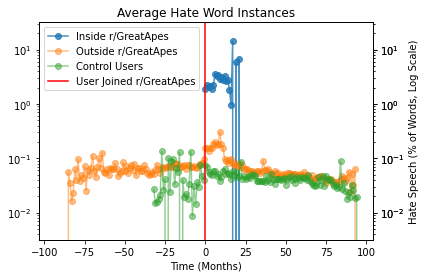

In [22]:
plt.figure(figsize=(10,10))
fig, ax1 = plt.subplots()

x1 = result_in['Time Difference (Months)']
y1 = result_in['Average Proportion of Hate Words']
x2 = result_out['Time Difference (Months)']
y2 = result_out['Average Proportion of Hate Words']
x3 = control_users['Time Difference (Months)']
y3 = control_users['Average Proportion of Hate Words']

ax2 = ax1.twinx()
ax3 = ax1.twinx()

l1,=ax1.plot(x1, y1, '-ok',color='tab:blue',alpha=0.8,label='Inside r/GreatApes')
# ax1.set_ylim([0,14.75])
l2,=ax2.plot(x2, y2, '-ok',color='tab:orange',alpha=0.5,label='Outside r/GreatApes')
l4,=ax3.plot(x3,y3,'-ok',color='tab:green',alpha=0.5,label='Control Users')
# ax2.set_ylim([0,14.75])
# ax3.set_ylim([0,14.75])

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylim([10 ** (-2.5),10**(1.5)])
ax2.set_ylim([10 ** (-2.5),10**(1.5)])
ax3.set_ylim([10 ** (-2.5),10**(1.5)])

# plt.figure(figsize=(6, 4))
plt.title("Average Hate Word Instances")
ax1.set_xlabel('Time (Months)')
# plt.xlabel('Time (Days)')
plt.ylabel("Hate Speech (% of Words, Log Scale)")
l3=plt.axvline(x=0,color='red',label='Users Joined r/GreatApes')
# l4=plt.hlines(y=avg_before,xmin=-2670,xmax=0,label='Average Number of Hate Words Before Joining',color='green')  # note variable avg_before
# l5=plt.hlines(y=avg_after,xmin=0,xmax=2727,label='Average Number of Hate Words After Joining',color='blue')  # note variable avg_before
# plt.legend([l1,l2,l3,l4,l5],['Hate Words Inside r/GreatApes','Hate Words Outside r/GreatApes','Users Joined r/GreatApes','Average Number of Hate Words Before Joining','Average Number of Hate Words After Joining'],loc='upper left')
plt.legend([l1,l2,l4,l3],['Inside r/GreatApes','Outside r/GreatApes','Control Users','User Joined r/GreatApes'],loc='upper left')

plt.show()

In [23]:
fig.savefig(r'D:/ISI REU Python/Figures/hw_all_mo_log_control.png')

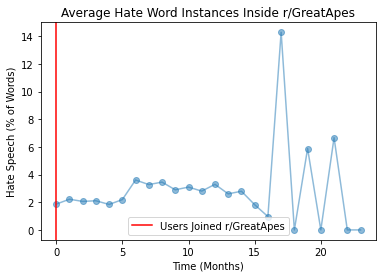

In [206]:
fig, ax1 = plt.subplots()
# ax1.set_ylim([0,1])
ax1.plot(x1, y1, '-ok',color='tab:blue',alpha=0.5)

plt.title("Average Hate Word Instances Inside r/GreatApes")
plt.xlabel("Time (Months)")
plt.ylabel("Hate Speech (% of Words)")
plt.axvline(x=0,color='red',label='Users Joined r/GreatApes')
plt.legend()

In [207]:
fig.savefig(r'D:/ISI REU Python/Figures/hw_in_mo.png')

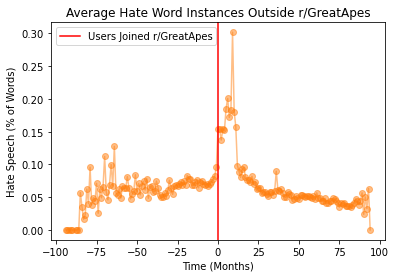

In [208]:
fig, ax1 = plt.subplots()
# ax1.set_ylim([0,4.7])
ax1.plot(x2, y2, '-ok',color='tab:orange',alpha=0.5)

plt.title("Average Hate Word Instances Outside r/GreatApes")
plt.xlabel("Time (Months)")
plt.ylabel("Hate Speech (% of Words)")
plt.axvline(x=0,color='red',label='Users Joined r/GreatApes')
plt.legend()

In [209]:
fig.savefig(r'D:/ISI REU Python/Figures/hw_out_mo.png')